<p>In this notebook, I'm going to reanalyze the data that made Dr. Ignaz Semmelweis (a Hungarian physician born in 1818 and active at the Vienna General Hospital) discovered the importance of <em>handwashing</em>.</p>

## looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital

In [1]:
import pandas as pd
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. Giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth.</p>

<p>Looking at the <em>proportion of deaths</em> out of the number of women giving birth.</p>

In [2]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

yearly_cl1 = yearly[yearly['clinic'] == 'clinic 1']
yearly_cl2 = yearly[yearly['clinic'] == 'clinic 2']

print(yearly_cl1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


## Ploting the proportion of deaths at both clinic 1 and clinic 2

Text(0, 0.5, 'Proportion deaths')

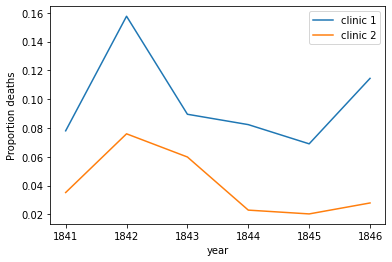

In [3]:
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly_cl1.plot(x='year', y='proportion_deaths', label='clinic 1')
yearly_cl2.plot(x='year', y='proportion_deaths', ax=ax, label='clinic 2')
ax.set_ylabel('Proportion deaths')

<p>Why is the proportion of deaths constantly so much higher in Clinic 1?</p>
<p>Semmelweis saw a pattern. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>

## The handwashing begins
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed to wash their hands.</p>

In [4]:
# loading monthly data from Clinic 1
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


## The effect of handwashing

Text(0, 0.5, 'Proportion deaths')

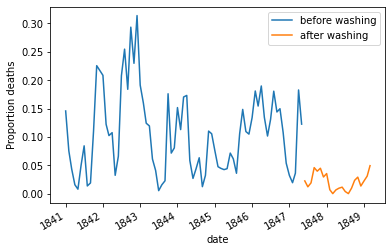

In [5]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', label='before washing')
after_washing.plot(x='date', y='proportion_deaths', ax=ax, label='after washing')
ax.set_ylabel('Proportion deaths')

<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced, this was when Semmelweis made handwashing obligatory. </p>

## How much did it reduce the monthly proportion of deaths on average?

In [6]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% </p>

## A Bootstrap analysis of Semmelweis handwashing data
<p>Looking at a confidence interval calculated using the bootstrap method to get a feeling for the uncertainty around how much handwashing reduces mortalities.</p>

In [7]:
import numpy as np
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    
    boot_before = before_washing['proportion_deaths'].sample(frac=1, replace=True)
    boot_after = after_washing['proportion_deaths'].sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100443
0.975   -0.067286
dtype: float64

# Conclusion
<p>Handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>